<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
هایپرپارامترها
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
هدف از این تمرین،‌ آشنایی عمیق‌تر با هایپرپارامترهای مختلف یک شبکه‌ی عصبی و تاثیر آن‌ها در عملکرد شبکه است. برای این کار به حل یک مسئله‌ی دسته‌بندی چندکلاسه تصویر خواهیم پرداخت، البته بدون استفاده از لایه‌های کانولوشنی، و سعی خواهیم کرد با تنظیم بهتر هایپرپارامترها به مدلی با عملکرد بهتر دست یابیم.
</font>
</p>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<span style="color:red"><b>توجه:</b></span>
با این‌که داده‌های این مسئله از جنس تصویر است اما به دلیل ساده بودن آن نیازی به استفاده از لایه‌های کانولوشنی نخواهیم داشت و در این تمرین باید از لایه‌های کاملاْ متصل (Fully Connected) استفاده کنید.
<br>
<span style="color:orange"><b>نکته:</b></span>
پیشنهاد می‌شود به دلیل احتمال طولانی‌شدن فرآیند آموزش مدل در سیستم شخصی شما، این نت‌بوک را روی گوگل کولب اجرا کنید.
</font>
</p>


In [1]:
from scipy import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, LeakyReLU
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
‌خواندن داده
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
مجموعه‌داده‌ی این مسئله «هدی» نام دارد که برگرفته از <a href="https://www.sciencedirect.com/science/article/abs/pii/S0167865507000037">این پژوهش</a> است و شامل تصویر ارقام دست‌نویس فارسی‌ست. هر تصویر با یک برچسب از ۰ تا ۹ مشخص شده است. این مجموعه‌داده را می‌توانید از فایل <code>hoda.mat</code> بخوانید. نیاز است ۴۰۰۰۰ تصویر نخست را به‌عنوان مجموعه‌ی آموزشی، ۱۰۰۰۰ تصویر بعد را به‌عنوان مجموعه‌ی اعتبارسنجی و ۱۰۰۰۰ تصویر آخر را به‌عنوان مجموعه‌ی آزمون در نظر بگیرید.
<br>
<span style="color:green"><b>راهنمایی ۱:</b></span>
برای خوانش این فایل می‌توانید از تابع <code>io.loadmat</code> از کتابخانه‌ی <code>scipy</code> استفاده کنید.
<br>
<span style="color:green"><b>راهنمایی ۲:</b></span>
نمونه‌ها در آرایه‌ای با نام <code>Data</code> و برچسب‌ها در آرایه‌ای با نام <code>labels</code> قرار گرفته‌اند.
برای دسترسی راحت‌تر به نمونه‌های مجموعه‌داده و جداسازی آن تابع <code>np.squeeze</code> به کمک شما می‌آید.
<br>
<span style="color:green"><b>راهنمایی ۳:</b></span>
اگر نت‌بوک را روی گوگل کولب اجرا می‌کنید برای دریافت آسان فایل مجموعه‌داده می‌توانید از کد زیر بهره ببرید تا فایل مربوطه به‌صورت مستقیم از گوگل درایو دانلود شود.
<center>
<code>!gdown 1LJcwIeUsswfpAnlPtYiFkGpIhQdeFHwq</code>
</center>

</font>
</p>

In [2]:
!gdown 1LJcwIeUsswfpAnlPtYiFkGpIhQdeFHwq

Downloading...
From: https://drive.google.com/uc?id=1LJcwIeUsswfpAnlPtYiFkGpIhQdeFHwq
To: /content/hoda.mat
100% 3.99M/3.99M [00:00<00:00, 125MB/s]


In [3]:
data = io.loadmat('hoda.mat') # Read data from .mat file
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Jun 30 20:26:30 2011',
 '__version__': '1.0',
 '__globals__': [],
 'Data': array([[array([[  0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0,
                   0,   0,   0,   0,   0,   0,   0],
                [  0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,
                   0,   0,   0,   0,   0,   0,   0],
                [  0,   0, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,
                   0,   0,   0,   0, 255, 255,   0],
                [  0, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,
                   0,   0,   0, 255, 255, 255, 255],
                [  0, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,
                   0,   0, 255, 255, 255, 255,   0],
                [  0, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                   0, 255, 255, 255, 255, 255,   0],
                [255, 255, 255, 255,   0,  

In [4]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Data', 'labels'])

In [5]:
data.items()

dict_items([('__header__', b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Jun 30 20:26:30 2011'), ('__version__', '1.0'), ('__globals__', []), ('Data', array([[array([[  0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0,
                  0,   0,   0,   0,   0,   0,   0],
               [  0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,
                  0,   0,   0,   0,   0,   0,   0],
               [  0,   0, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,
                  0,   0,   0,   0, 255, 255,   0],
               [  0, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,
                  0,   0,   0, 255, 255, 255, 255],
               [  0, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,
                  0,   0, 255, 255, 255, 255,   0],
               [  0, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                  0, 255, 255, 255, 255, 255,   0],
               [255, 255, 255, 255,   0

In [6]:
data.values()

dict_values([b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Jun 30 20:26:30 2011', '1.0', [], array([[array([[  0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0,
                  0,   0,   0,   0,   0,   0,   0],
               [  0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,
                  0,   0,   0,   0,   0,   0,   0],
               [  0,   0, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,
                  0,   0,   0,   0, 255, 255,   0],
               [  0, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,
                  0,   0,   0, 255, 255, 255, 255],
               [  0, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,
                  0,   0, 255, 255, 255, 255,   0],
               [  0, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                  0, 255, 255, 255, 255, 255,   0],
               [255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                

In [7]:
images = data['Data']
labels = data['labels']
images = np.squeeze(images)

In [8]:
X_train = images[:40000] # Extract training data (40000 images) # X_train = data['Data'][:40000]
y_train = labels[:40000] # Extract training labels (40000 labels) # y_train = np.squeeze(data['labels'][:40000])
X_valid = images[40000:50000] # Extract validation data (10000 images) # X_valid = data['Data'][40000:50000]
y_valid = labels[40000:50000] # Extract validation labels (10000 labels) # y_valid = np.squeeze(data['labels'][40000:50000])
X_test = images[50000:] # Extract testing data (10000 images) # X_test = data['Data'][50000:]
y_test = labels[50000:] # Extract testing labels (10000 labels) # y_test = np.squeeze(data['labels'][50000:])

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(40000,) (40000, 1)
(10000,) (10000, 1)
(10000,) (10000, 1)


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
پس از خوانش و جداسازی نمونه‌ها، ۹ نمونه‌ی اول مجموعه‌ی آموزشی را در یک شکل ۳ در ۳ به همراه برچسب‌های آن‌ها نمایش دهید.
</font>
</p>

In [9]:
print(X_train[0].shape)
print(X_train[0].dtype)

(27, 20)
uint8


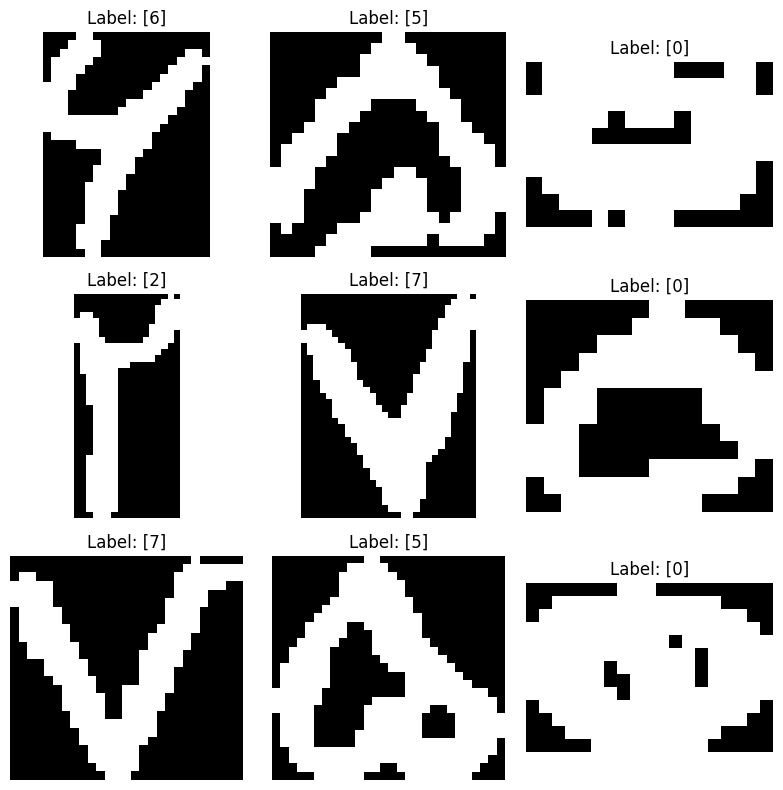

In [10]:
# Define a function to plot images with labels
def plot_images(images, labels):
    fig, axes = plt.subplots(3, 3, figsize=(8, 8))
    axes = axes.ravel()  # Flatten the axes for easy iteration

    for i in range(len(axes)):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title('Label: {}'.format(labels[i]))
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Plot the first 9 images in the training set
plot_images(X_train[:9], y_train[:9])

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
آماده‌سازی داده
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
همان‌طور که احتمالاً از تصویرهای نمایش داده‌شده در بخش قبل متوجه شده‌اید تصاویر موجود در این مجموعه‌داده با اندازه‌های گوناگونی هستند. از آن‌جا که نیاز است ورودی‌های شبکه‌ی ما همگی با یک اندازه‌ی مشخص باشند نیاز است تصاویر را به یک اندازه‌ی مشابه نگاشت کنید. یک ایده این است که اندازه‌ی تصاویر خود را ۶۲ در ۶۲ در نظر بگیرید و هر تصویری که کوچک‌تر از این اندازه است را با اضافه کردن سطرها یا ستون‌های مشکی به اطراف آن به این اندازه برسانید، به‌نحوی که رقم دست‌نویس در وسط تصویر باقی بماند. بنابراین پیشنهاد می‌کنیم در این قسمت چنین روشی را پیاده‌سازی کنید. با این حال، اگر احساس می‌کنید قادر به پیاده‌سازی رویکرد بهتری هستید نیز آزاد هستید از آن استفاده کنید و توضیحاتی ارائه دهید. توجه داشته باشید باید این کار را برای تمام تصاویر موجود در تمام مجموعه‌ها (آموزشی، اعتبارسنجی و آزمون) انجام دهید.
</font>
</p>

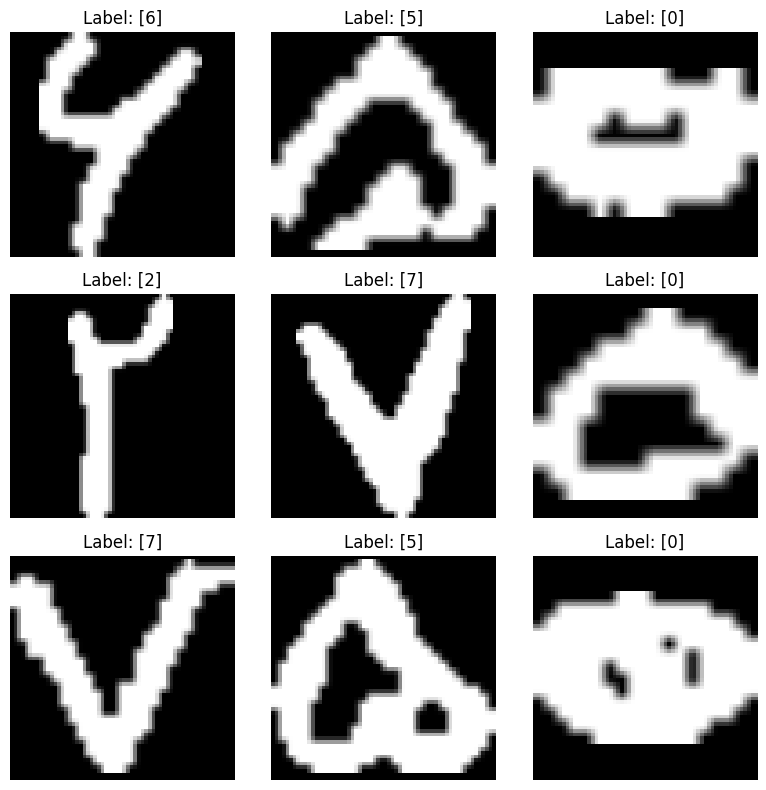

In [11]:
import cv2

def resize_image(images):
  resized_images = []
  for img in images:
    old_size = img.shape[:2] # old_w, old_h
    ratio = float(62)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])
    img = cv2.resize(img, (new_size[1], new_size[0]))
    delta_w = 62 - new_size[1]
    delta_h = 62 - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)
    resized = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[0,0,0])
    resized_images.append(resized)

  return np.array(resized_images)
X_train_resized = resize_image(X_train) # Resize training images to 62x62
X_valid_resized = resize_image(X_valid)  # Resize validation images to 62x62
X_test_resized = resize_image(X_test)  # Resize testing images to 62x62
# Plot resized images
plot_images(X_train_resized[:9], y_train[:9])

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
پس از این تغییر اندازه، مجدد ۹ نمونه‌ی اول مجموعه‌ی آموزشی را در یک شکل ۳ در ۳ به همراه برچسب‌های آن‌ها نمایش دهید.
</font>
</p>

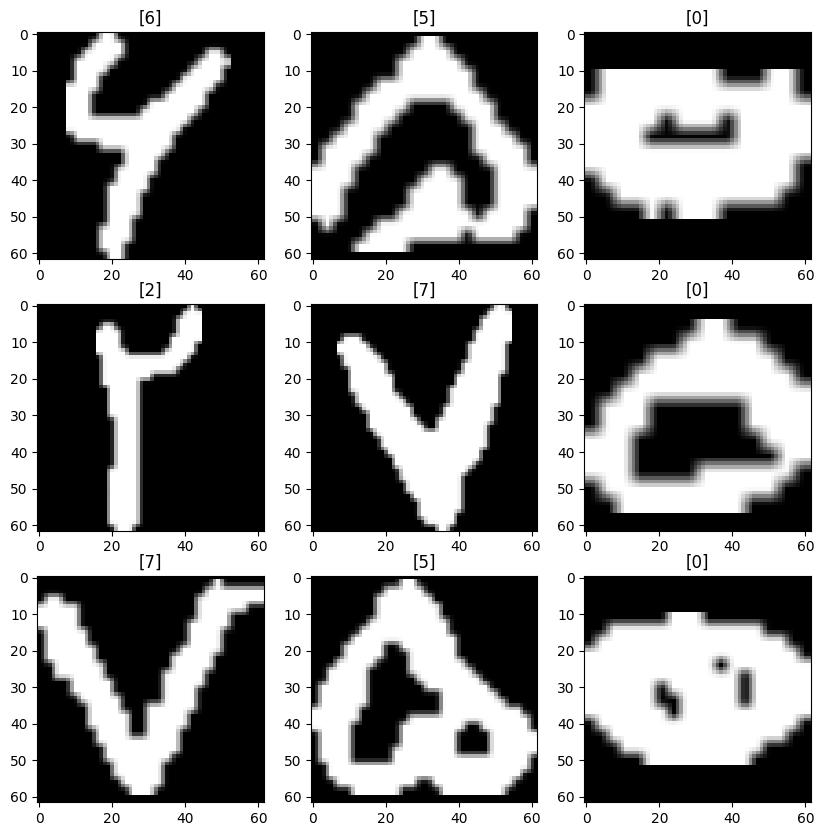

In [12]:
# plot the first 9 images in the training set in a 3x3 grid after resizing
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i in range(9):
    axes[i // 3, i % 3].imshow(X_train_resized[i], cmap='gray')
    axes[i // 3, i % 3].set_title(str(y_train[i]))
plt.show()

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
از آن‌جا که شبکه‌ی عصبی مورد استفاده در این تمرین یک شبکه‌ی عمیق کاملاً متصل خواهد بود، ورودی شبکه باید به‌شکل یک بردار باشد، و نه ماتریس. بنابراین در این قسمت نیاز است هر تصویر را مسطح کرده و به شکل یک بردار نشان دهید. یعنی هر تصویر ۶۲ در ۶۲ شما باید به شکل یک بردار ۳۸۴۴ بازنمایی شود.
</font>
</p>

In [13]:
X_train_vectorized = X_train_resized.reshape(-1, 62*62)  # Vectorize training images
X_valid_vectorized = X_valid_resized.reshape(-1, 62*62)  # Vectorize validation images
X_test_vectorized = X_test_resized.reshape(-1, 62*62)  # Vectorize testing images

print(X_train_vectorized.shape)
print(X_valid_vectorized.shape)
print(X_test_vectorized.shape)

(40000, 3844)
(10000, 3844)
(10000, 3844)


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
علاوه بر این، به دلیل آسان‌تر شدن فرآیند آموزش مدل پیشنهاد می‌شود مقادیر هر تصویر که شامل اعداد ۰ تا ۲۵۵ هستند را به بازه‌ی ۰ تا ۱ نرمال کنید. برای این‌کار می‌توانید به‌سادگی مقادیر را تقسیم بر ۲۵۵ کنید.
</font>
</p>

In [14]:
X_train_normalized = X_train_vectorized / 255 # Normalize training images
X_valid_normalized = X_valid_vectorized / 255 # Normalize validation images
X_test_normalized = X_test_vectorized / 255 # Normalize testing images

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
همچنین با توجه به این‌که مسئله‌ی ما چندکلاسه است نیاز است خروجی شبکه به‌صورت بردار تک‌نمود (One-Hot) باشد.
بنابراین در این قسمت نیاز است برچسب‌ها را به کمک تابع <code>to_categorical</code> از کتابخانه‌ی <code>keras.utils</code> به این شکل تبدیل کنید.
</font>
</p>

In [15]:
y_train_onehot = to_categorical(y_train) # One-hot encode training labels
y_valid_onehot = to_categorical(y_valid) # One-hot encode validation labels
y_test_onehot = to_categorical(y_test) # One-hot encode testing labels

print(y_train_onehot.shape)
print(y_valid_onehot.shape)
print(y_test_onehot.shape)

(40000, 10)
(10000, 10)
(10000, 10)


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
ساخت مدل
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این قسمت می‌خواهیم مرحله به مرحله چند ساختار شبکه‌ی مختلف را مورد آزمایش قرار دهیم و عملکرد هرکدام از آن‌ها را روی یک نمودار واحد نمایش دهیم تا قادر به مقایسه و تحلیل آن‌ها باشیم.
</font>
</p>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<span style="color:red"><b>توجه:</b></span>
تاریخچه‌ی عملکرد هر مدل روی مجموعه‌ی اعتبارسنجی (دقت مدل در هر دور) را به‌صورت جداگانه نگه دارید زیرا که نیاز است در آخر یک نمودار مشترک از آن‌ها رسم کنید.
</font>
</p>


<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مدل اول
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ابتدا شبکه‌ای بسازید که در لایه‌ی ورودی شامل ۶۴ نورون باشد و از تابع فعال‌سازی <code>tanh</code> استفاده کنید. سپس یک لایه‌ی کاملاً متصل با ۱۰ نورون به‌عنوان لایه‌ی خروجی قرار داده و از تابع فعال‌سازی <code>softmax</code> استفاده کنید. در نهایت از تابع <code>categorical_crossentropy</code> به‌عنوان تابع هزینه استفاده کنید و تابع بهینه‌ساز را معادل <code>SGD</code> با نرخ یادگیری <code>0.01</code> قرار دهید.
<br>
علاوه بر این، برای آموزش مدل از تکنیک <code>EarlyStopping</code> استفاده کنید تا نیاز به آموزش بی‌رویه‌ی مدل نباشد. می‌توانید مانیتور آن را روی <code>`val_loss`</code> و <code>patience</code> آن را روی <code>10</code> تنظیم کنید.
<br>
در انتها مدل خود را برای ۱۰۰ دور و با اندازه‌ی دسته معادل ۳۲ آموزش دهید.
</font>
</p>

In [16]:
model1 = Sequential()
# Add a dense layer with 64 neurons and tanh activation
model1.add(Dense(64, activation='tanh', input_shape=(X_train_normalized.shape[1],)))

# Add a dense layer with 10 neurons and softmax activation
model1.add(Dense(10, activation='softmax'))

In [17]:
model1.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy']) # To-Do (Compile the model)
early_stopping = EarlyStopping(patience=10, monitor='val_loss') # To-Do (Stop training when validation loss does not improve for 10 epochs)

In [18]:
history1 = model1.fit(X_train_normalized, y_train_onehot, epochs=100, batch_size=32, validation_data=(X_valid_normalized, y_valid_onehot), callbacks=[early_stopping]) # To-Do (Fit the model with training data and validation data)

Epoch 1/100
1250/1250 [==============================] - 16s 12ms/step - loss: 0.2728 - accuracy: 0.9323 - val_loss: 0.1727 - val_accuracy: 0.9562
Epoch 2/100
1250/1250 [==============================] - 8s 6ms/step - loss: 0.1478 - accuracy: 0.9623 - val_loss: 0.1374 - val_accuracy: 0.9646
Epoch 3/100
1250/1250 [==============================] - 7s 5ms/step - loss: 0.1216 - accuracy: 0.9686 - val_loss: 0.1201 - val_accuracy: 0.9670
Epoch 4/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.1064 - accuracy: 0.9726 - val_loss: 0.1110 - val_accuracy: 0.9710
Epoch 5/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0955 - accuracy: 0.9754 - val_loss: 0.1033 - val_accuracy: 0.9706
Epoch 6/100
1250/1250 [==============================] - 7s 6ms/step - loss: 0.0871 - accuracy: 0.9772 - val_loss: 0.0967 - val_accuracy: 0.9731
Epoch 7/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0802 - accuracy: 0.9790 - val_loss: 0.0938 - val_

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
عملکرد مدل نهایی را روی مجموعه‌ی اعتبارسنجی گزارش کنید. علاوه بر این نمودار دقت مدل را برای مجموعه‌ی آموزشی و آزمون در یک نمودار واحد نشان دهید.
</font>
</p>

In [19]:
# To-Do (Final accuracy on validation data)
print('Validation accuracy:', model1.evaluate(X_valid_normalized, y_valid_onehot, verbose=0)[1])

Validation accuracy: 0.9847999811172485


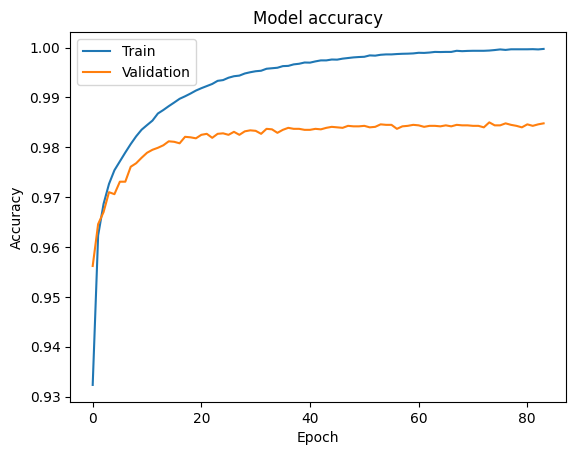

In [20]:
# To-Do (Plot training and validation accuracy)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مدل دوم
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اکنون مدل دیگری طراحی کنید که مشابه با مدل قبل بوده و تنها تابع فعال‌ساز آن در لایه‌ی نخست <code>ReLU</code> باشد. مراحل قبل را در این مدل نیز تکرار کنید.
</font>
</p>

In [21]:
model2 = Sequential()
# Add a dense layer with 64 neurons and ReLU activation
model2.add(Dense(64, activation='relu', input_shape=(X_train_normalized.shape[1],)))

# Add a dense layer with 10 neurons and softmax activation
model2.add(Dense(10, activation='softmax'))

In [22]:
model2.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy']) # To-Do (Compile the model)
early_stopping = EarlyStopping(patience=10, monitor='val_loss') # To-Do (Stop training when validation loss does not improve for 10 epochs)

In [23]:
history2 = model2.fit(X_train_normalized, y_train_onehot, epochs=100, batch_size=32, validation_data=(X_valid_normalized, y_valid_onehot), callbacks=[early_stopping]) # To-Do (Fit the model with training data and validation data)

Epoch 1/100
1250/1250 [==============================] - 9s 7ms/step - loss: 0.2478 - accuracy: 0.9349 - val_loss: 0.1536 - val_accuracy: 0.9570
Epoch 2/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.1297 - accuracy: 0.9649 - val_loss: 0.1248 - val_accuracy: 0.9653
Epoch 3/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.1082 - accuracy: 0.9707 - val_loss: 0.1090 - val_accuracy: 0.9695
Epoch 4/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0939 - accuracy: 0.9746 - val_loss: 0.1002 - val_accuracy: 0.9718
Epoch 5/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0834 - accuracy: 0.9777 - val_loss: 0.0914 - val_accuracy: 0.9744
Epoch 6/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0751 - accuracy: 0.9798 - val_loss: 0.0851 - val_accuracy: 0.9770
Epoch 7/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0683 - accuracy: 0.9818 - val_loss: 0.0816 - val_ac

In [24]:
# To-Do (Final accuracy on validation data)
print('Validation accuracy:', model2.evaluate(X_valid_normalized, y_valid_onehot, verbose=0)[1])

Validation accuracy: 0.98580002784729


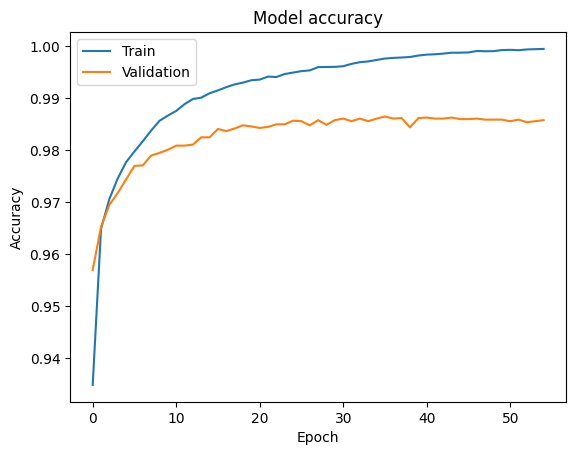

In [25]:
# To-Do (Plot training and validation accuracy)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مدل سوم
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اکنون یک مدل مشابه مدل قبل طراحی کرده اما بین لایه‌ی ورودی و خروجی یک لایه‌ی کاملاً متصل دیگر شامل ۲۵۶ نورون قرار دهید و از تابع فعال‌سازی <code>relu</code> استفاده کنید. مراحل قبل را تکرار کنید.
</font>
</p>

In [26]:
model3 = Sequential()
# Add a dense layer with 64 neurons and ReLU activation
model3.add(Dense(64, activation='relu', input_shape=(X_train_normalized.shape[1],)))

# Add a dense layer with 256 neurons and ReLU activation
model3.add(Dense(256, activation='relu'))

# Add a dense layer with 10 neurons and softmax activation
model3.add(Dense(10, activation='softmax'))

In [27]:
model3.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy']) # To-Do (Compile the model)
early_stopping = EarlyStopping(patience=10, monitor='val_loss') # To-Do (Stop training when validation loss does not improve for 10 epochs)

In [28]:
history3 = model3.fit(X_train_normalized, y_train_onehot, epochs=100, batch_size=32, validation_data=(X_valid_normalized, y_valid_onehot), callbacks=[early_stopping]) # To-Do (Fit the model with training data and validation data)

Epoch 1/100
1250/1250 [==============================] - 9s 6ms/step - loss: 0.2932 - accuracy: 0.9219 - val_loss: 0.1499 - val_accuracy: 0.9581
Epoch 2/100
1250/1250 [==============================] - 6s 4ms/step - loss: 0.1233 - accuracy: 0.9653 - val_loss: 0.1165 - val_accuracy: 0.9659
Epoch 3/100
1250/1250 [==============================] - 8s 6ms/step - loss: 0.1011 - accuracy: 0.9713 - val_loss: 0.1069 - val_accuracy: 0.9711
Epoch 4/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0873 - accuracy: 0.9756 - val_loss: 0.0931 - val_accuracy: 0.9726
Epoch 5/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0771 - accuracy: 0.9786 - val_loss: 0.0873 - val_accuracy: 0.9753
Epoch 6/100
1250/1250 [==============================] - 8s 6ms/step - loss: 0.0691 - accuracy: 0.9812 - val_loss: 0.0806 - val_accuracy: 0.9773
Epoch 7/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0621 - accuracy: 0.9832 - val_loss: 0.0816 - val_ac

In [29]:
# To-Do (Final accuracy on validation data)
print('Validation accuracy:', model3.evaluate(X_valid_normalized, y_valid_onehot, verbose=0)[1])

Validation accuracy: 0.9847000241279602


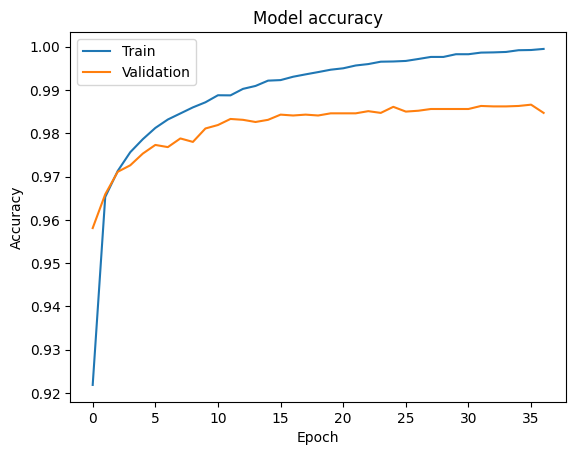

In [30]:
# To-Do (Plot training and validation accuracy)
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مدل چهارم
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اکنون توابع فعال‌ساز <code>ReLU</code> مدل قبل را به <code>LeakyReLU</code> با آلفای <code>0.1</code> تغییر دهید و مراحل قبل را تکرار کنید.
</font>
</p>

In [31]:
model4 = Sequential()
# Add a dense layer with 64 neurons and LeakyReLU activation
model4.add(Dense(64, activation=LeakyReLU(alpha=0.1), input_shape=(X_train_normalized.shape[1],)))

# Add a dense layer with 256 neurons and LeakyReLU activation
model4.add(Dense(256, activation=LeakyReLU(alpha=0.1)))

# Add a dense layer with 10 neurons and softmax activation
model4.add(Dense(10, activation='softmax'))

In [32]:
model4.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy']) # To-Do (Compile the model)
early_stopping = EarlyStopping(patience=10, monitor='val_loss') # To-Do (Stop training when validation loss does not improve for 10 epochs)

In [33]:
history4 = model4.fit(X_train_normalized, y_train_onehot, epochs=100, batch_size=32, validation_data=(X_valid_normalized, y_valid_onehot), callbacks=[early_stopping]) # To-Do (Fit the model with training data and validation data)

Epoch 1/100
1250/1250 [==============================] - 7s 5ms/step - loss: 0.2898 - accuracy: 0.9240 - val_loss: 0.1491 - val_accuracy: 0.9582
Epoch 2/100
1250/1250 [==============================] - 8s 7ms/step - loss: 0.1275 - accuracy: 0.9640 - val_loss: 0.1227 - val_accuracy: 0.9657
Epoch 3/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.1058 - accuracy: 0.9706 - val_loss: 0.1059 - val_accuracy: 0.9693
Epoch 4/100
1250/1250 [==============================] - 9s 7ms/step - loss: 0.0910 - accuracy: 0.9740 - val_loss: 0.1025 - val_accuracy: 0.9705
Epoch 5/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0805 - accuracy: 0.9775 - val_loss: 0.0918 - val_accuracy: 0.9744
Epoch 6/100
1250/1250 [==============================] - 7s 5ms/step - loss: 0.0716 - accuracy: 0.9807 - val_loss: 0.0855 - val_accuracy: 0.9750
Epoch 7/100
1250/1250 [==============================] - 7s 6ms/step - loss: 0.0645 - accuracy: 0.9822 - val_loss: 0.0813 - val_ac

In [34]:
# To-Do (Final accuracy on validation data)
print('Validation accuracy:', model4.evaluate(X_valid_normalized, y_valid_onehot, verbose=0)[1])

Validation accuracy: 0.9853000044822693


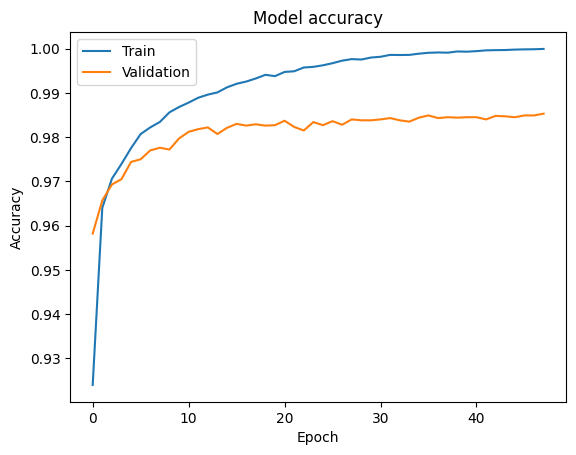

In [35]:
# To-Do (Plot training and validation accuracy)
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مقایسه و تحلیل مدل‌ها
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اکنون از شما می‌خواهیم یک نمودار واحد رسم کنید که دقت هرکدام از مدل‌های بالا روی مجموعه‌ی اعتبارسنجی در هر دور با یک خط و رنگ مجزا نشان داده شده باشد.
<br>
پس از رسم این نمودار، لطفاً طبق نتایج به‌دست‌آمده تحلیل خود را از تاثیر هرکدام از هایپرپارامترها یا تغییراتی که در مدل داده‌اید بنویسید. سعی کنید در تحلیل خود دلیلی برای وجود این تفاوت‌ها ارائه دهید.
</font>
</p>

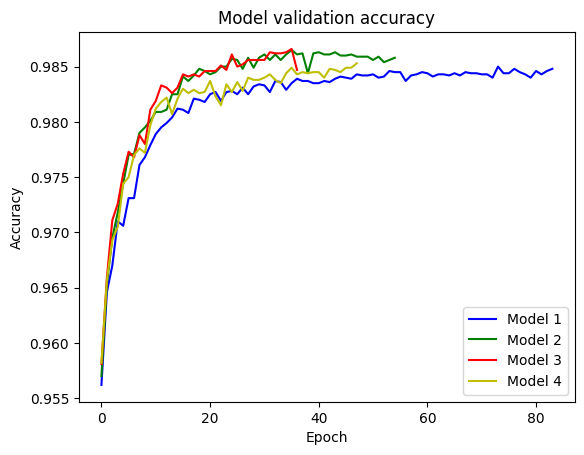

In [36]:
# To-Do (Plot validation accuracy of all models)
plt.plot(history1.history['val_accuracy'], label='Model 1', color='b')
plt.plot(history2.history['val_accuracy'], label='Model 2', color='g')
plt.plot(history3.history['val_accuracy'], label='Model 3', color='r')
plt.plot(history4.history['val_accuracy'], label='Model 4', color='y')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium; color:#0099cc"><font face="vazir" size=3><i>
همان‌طور که در نمودار بالا مشاهده می‌شود، دقت مدل‌های دوم، سوم و چهارم نسبت به مدل اول بیشتر است. این نشان می‌دهد که استفاده از تابع فعال‌ساز ReLU یا LeakyReLU و اضافه کردن یک لایه‌ی کاملاً متصل دیگر بین لایه‌ی ورودی و خروجی می‌تواند به بهبود عملکرد شبکه‌های عصبی عمیق کمک کند.
</i></font></p>
<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium; color:#0099cc"><font face="vazir" size=3><i>
تأثیر تابع فعال‌ساز:
مدل اول از تابع فعال‌ساز tanh استفاده می‌کند. مدل‌های دوم و سوم از تابع فعال‌ساز ReLU استفاده می‌کنند. مدل چهارم از تابع فعال‌ساز LeakyReLU استفاده می‌کند.
با توجه به نمودار بالا، می‌توان نتیجه گرفت که استفاده از تابع فعال‌ساز ReLU یا LeakyReLU می‌تواند به بهبود عملکرد شبکه‌های عصبی عمیق کمک کند. این امر به این دلیل است که تابع‌های فعال‌ساز ReLU و LeakyReLU می‌توانند از اشباع شدن جلوگیری کنند. اشباع شدن زمانی اتفاق می‌افتد که خروجی یک نورون به یک مقدار ثابت می‌رسد. این امر می‌تواند باعث شود که شبکه‌ی عصبی نتواند یاد بگیرد.
</i></font></p>
<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium; color:#0099cc"><font face="vazir" size=3><i>
تأثیر تعداد لایه‌ها:
مدل اول دارای یک لایه‌ی کاملاً متصل است. مدل‌های دوم، سوم و چهارم دارای دو لایه‌ی کاملاً متصل هستند.
با توجه به نمودار بالا، می‌توان نتیجه گرفت که اضافه کردن یک لایه‌ی کاملاً متصل دیگر بین لایه‌ی ورودی و خروجی می‌تواند به بهبود عملکرد شبکه‌های عصبی عمیق کمک کند. این امر به این دلیل است که اضافه کردن لایه‌های بیشتر می‌تواند به شبکه‌ی عصبی اجازه دهد که ویژگی‌های پیچیده‌تری از داده‌ها را یاد بگیرد.
</i></font></p>
<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium; color:#0099cc"><font face="vazir" size=3><i>
نتیجه‌گیری:
در این تمرین، چهار مدل مختلف را برای تشخیص رقم‌های دست‌نویس مورد آزمایش قرار دادیم. نتایج به‌دست‌آمده نشان داد که استفاده از تابع فعال‌ساز ReLU یا LeakyReLU و اضافه کردن یک لایه‌ی کاملاً متصل دیگر بین لایه‌ی ورودی و خروجی می‌تواند به بهبود عملکرد شبکه‌های عصبی عمیق کمک کند.
</i></font></p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
جست‌وجوی بیشتر
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال به صلاح‌دید خود سعی کنید هایپرپارامترهای بیشتری را تنظیم کنید تا به مدلی با عملکرد بهتر روی مجموعه‌ی اعتبارسنجی دست یابید. می‌توانید از تکنیک <code>Dropout</code> بهره ببرید، وزن‌ها را رگولارایز کنید، از روش دیگری برای مقداردهی اولیه‌ی وزن‌ها استفاده کنید، تعداد نورون‌ها یا لایه‌ها را کاهش یا افزایش دهید، تابع بهینه‌ساز را تغییر دهید یا نرخ یادگیری متفاوتی را امتحان کنید. همچنین می‌توانید از تنظیم‌کننده‌ی هایپرپارامتر کتابخانه‌ی کراس نیز بهره ببرید. در انتها نیاز است ساختار مدل شما،‌ عملکرد نهایی آن روی مجموعه‌ی آموزشی و نمودار دقت آن در مجموعه‌ی آموزشی و اعتبارسنجی قابل مشاهده باشد.
</font>
</p>

In [37]:
# To-Do (Further tuning of hyperparameters)
# Build the model
model5 = Sequential()
model5.add(Dense(64, activation='relu', input_shape=(X_train_normalized.shape[1],)))
model5.add(Dropout(0.2))
model5.add(Dense(256, activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(10, activation='softmax'))

# Compile the model
model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Stop training when validation loss does not improve for 10 epochs
early_stopping = EarlyStopping(patience=10, monitor='val_loss')

# Fit the model with training data and validation data
history5 = model5.fit(X_train_normalized, y_train_onehot, epochs=100, batch_size=32, validation_data=(X_valid_normalized, y_valid_onehot), callbacks=[early_stopping])

Epoch 1/100
1250/1250 [==============================] - 11s 8ms/step - loss: 0.2188 - accuracy: 0.9333 - val_loss: 0.0910 - val_accuracy: 0.9735
Epoch 2/100
1250/1250 [==============================] - 10s 8ms/step - loss: 0.1208 - accuracy: 0.9637 - val_loss: 0.0895 - val_accuracy: 0.9727
Epoch 3/100
1250/1250 [==============================] - 12s 9ms/step - loss: 0.0984 - accuracy: 0.9707 - val_loss: 0.0737 - val_accuracy: 0.9789
Epoch 4/100
1250/1250 [==============================] - 9s 7ms/step - loss: 0.0897 - accuracy: 0.9728 - val_loss: 0.0749 - val_accuracy: 0.9803
Epoch 5/100
1250/1250 [==============================] - 11s 9ms/step - loss: 0.0779 - accuracy: 0.9768 - val_loss: 0.0682 - val_accuracy: 0.9825
Epoch 6/100
1250/1250 [==============================] - 10s 8ms/step - loss: 0.0740 - accuracy: 0.9772 - val_loss: 0.0735 - val_accuracy: 0.9809
Epoch 7/100
1250/1250 [==============================] - 9s 7ms/step - loss: 0.0752 - accuracy: 0.9775 - val_loss: 0.0709 - v

In [38]:
# Final accuracy on validation data
print('Validation accuracy:', model5.evaluate(X_valid_normalized, y_valid_onehot, verbose=0)[1])

Validation accuracy: 0.9837999939918518


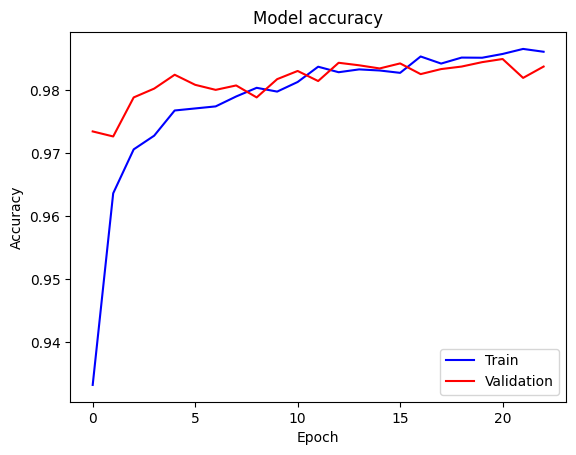

In [39]:
# Plot training and validation accuracy
plt.plot(history5.history['accuracy'], label='Train', color='b')
plt.plot(history5.history['val_accuracy'], label='Validation', color='r')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [40]:
# To-Do (Further tuning of hyperparameters)
# Build the model
# Add L2 Regularizer
from tensorflow import keras
regularizer=keras.regularizers.l2(1e-3)

model6 = Sequential()
model6.add(Dense(64, activation='relu', kernel_regularizer=regularizer, input_shape=(X_train_normalized.shape[1],)))
model6.add(Dropout(0.2))
model6.add(Dense(256, activation='relu', kernel_regularizer=regularizer))
model6.add(Dropout(0.2))
model6.add(Dense(10, activation='softmax', kernel_regularizer=regularizer))

# Compile the model
model6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Stop training when validation loss does not improve for 10 epochs
early_stopping = EarlyStopping(patience=10, monitor='val_loss')

# Fit the model with training data and validation data
history6 = model6.fit(X_train_normalized, y_train_onehot, epochs=100, batch_size=32, validation_data=(X_valid_normalized, y_valid_onehot), callbacks=[early_stopping])

Epoch 1/100
1250/1250 [==============================] - 12s 9ms/step - loss: 0.4000 - accuracy: 0.9329 - val_loss: 0.2404 - val_accuracy: 0.9746
Epoch 2/100
1250/1250 [==============================] - 11s 9ms/step - loss: 0.2796 - accuracy: 0.9582 - val_loss: 0.2257 - val_accuracy: 0.9688
Epoch 3/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.2518 - accuracy: 0.9623 - val_loss: 0.2126 - val_accuracy: 0.9728
Epoch 4/100
1250/1250 [==============================] - 11s 9ms/step - loss: 0.2454 - accuracy: 0.9627 - val_loss: 0.2146 - val_accuracy: 0.9707
Epoch 5/100
1250/1250 [==============================] - 11s 9ms/step - loss: 0.2435 - accuracy: 0.9618 - val_loss: 0.2081 - val_accuracy: 0.9710
Epoch 6/100
1250/1250 [==============================] - 12s 9ms/step - loss: 0.2411 - accuracy: 0.9629 - val_loss: 0.2156 - val_accuracy: 0.9712
Epoch 7/100
1250/1250 [==============================] - 11s 9ms/step - loss: 0.2447 - accuracy: 0.9620 - val_loss: 0.2046 

In [41]:
# Final accuracy on validation data
print('Validation accuracy:', model6.evaluate(X_valid_normalized, y_valid_onehot, verbose=0)[1])

Validation accuracy: 0.9757000207901001


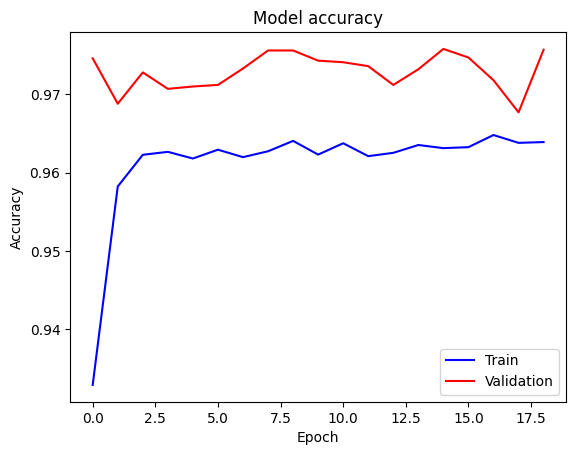

In [42]:
# Plot training and validation accuracy
plt.plot(history6.history['accuracy'], label='Train', color='b')
plt.plot(history6.history['val_accuracy'], label='Validation', color='r')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
نتیجه‌ی نهایی
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال که به مدلی با عملکرد بهتر روی مجموعه‌ی اعتبارسنجی دست پیدا کرده‌اید نیاز است این مدل نهایی‌شده را طبق نمونه‌های موجود در مجموعه‌ی آزمون ارزیابی کنید. با استفاده از تابع <code>classification_report</code> از کتابخانه‌ی <code>sklearn.metrics</code> گزارش دقت، صحت، بازخوانی و سایر معیارهای مربوط به مدل خود را روی مجموعه‌ی آزمون گزارش دهید.
</font>
</p>

In [44]:
# To-Do (Final metrics on testing data)
import tensorflow as tf

# Evaluate the model on test data
#y_pred = model5.predict(X_test_normalized)
# Get predicted probabilities on test set
y_prob = model5.predict(X_test_normalized)
y_prob = tf.convert_to_tensor(y_prob)
y_prob = y_prob.numpy()
# Convert probabilities to class labels
y_pred = np.argmax(y_prob, axis=1)
# Print classification report
print(classification_report(y_test, y_pred))

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       975
           1       0.99      1.00      0.99       999
           2       0.96      0.98      0.97       992
           3       0.99      0.96      0.97      1005
           4       0.98      0.99      0.98       991
           5       0.99      0.99      0.99      1020
           6       0.98      0.98      0.98       992
           7       1.00      0.99      0.99      1006
           8       0.99      0.99      0.99      1024
           9       0.98      0.98      0.98       996

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [45]:
# To-Do (Final metrics on testing data)

# Evaluate the model on test data
#y_pred = model5.predict(X_test_normalized)
# Get predicted probabilities on test set
y_prob = model6.predict(X_test_normalized)
y_prob = tf.convert_to_tensor(y_prob)
y_prob = y_prob.numpy()
# Convert probabilities to class labels
y_pred = np.argmax(y_prob, axis=1)
# Print classification report
print(classification_report(y_test, y_pred))

313/313 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       975
           1       0.99      0.99      0.99       999
           2       0.97      0.96      0.96       992
           3       0.92      0.98      0.95      1005
           4       0.99      0.93      0.96       991
           5       0.98      0.99      0.98      1020
           6       0.97      0.97      0.97       992
           7       0.99      0.99      0.99      1006
           8       0.99      0.99      0.99      1024
           9       0.97      0.99      0.98       996

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

